In [71]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error


In [72]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,ID,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
0,1_1,1,1,-0.33308,-0.99681,-0.98736,-0.94728,-0.91977,-0.21129,-0.38778,-0.39903,-0.14321,1
1,3_1,1,3,-0.67096,-2.08895,-2.08251,-2.02183,-1.93779,-0.46476,0.97308,-0.31078,0.80286,0
2,4_1,1,4,-0.22040,1.07839,1.09143,1.18737,NaN,-0.51638,-0.52368,-0.24140,-0.31910,0
3,6_1,1,6,-0.23118,-0.55106,-0.53976,-0.47569,-0.42449,-0.60816,-0.69311,-0.40673,-0.45965,0
4,10_1,1,10,0.15076,-1.40937,-1.39805,-1.36756,-1.31365,-0.33206,-0.43690,-0.33347,0.29217,0


In [7]:
train.shape

(702739, 13)

In [8]:
test.shape

(101946, 12)

In [9]:
train.timestamp[2002]

2

In [10]:
train.dtypes

ID                                object
timestamp                          int64
Stock_ID                           int64
Volume                           float64
Three_Day_Moving_Average         float64
Five_Day_Moving_Average          float64
Ten_Day_Moving_Average           float64
Twenty_Day_Moving_Average        float64
True_Range                       float64
Average_True_Range               float64
Positive_Directional_Movement    float64
Negative_Directional_Movement    float64
Outcome                            int64
dtype: object

In [11]:
train.skew()

timestamp                       -0.050950
Stock_ID                        -0.005594
Volume                           7.864515
Three_Day_Moving_Average         0.441945
Five_Day_Moving_Average          0.430048
Ten_Day_Moving_Average           0.416679
Twenty_Day_Moving_Average        0.407336
True_Range                       4.924696
Average_True_Range               1.855474
Positive_Directional_Movement    6.064986
Negative_Directional_Movement    5.154288
Outcome                          0.189170
dtype: float64

In [12]:
train.info()
# null values in many features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702739 entries, 0 to 702738
Data columns (total 13 columns):
ID                               702739 non-null object
timestamp                        702739 non-null int64
Stock_ID                         702739 non-null int64
Volume                           702739 non-null float64
Three_Day_Moving_Average         702291 non-null float64
Five_Day_Moving_Average          701837 non-null float64
Ten_Day_Moving_Average           700692 non-null float64
Twenty_Day_Moving_Average        698335 non-null float64
True_Range                       702739 non-null float64
Average_True_Range               699754 non-null float64
Positive_Directional_Movement    702515 non-null float64
Negative_Directional_Movement    702515 non-null float64
Outcome                          702739 non-null int64
dtypes: float64(9), int64(3), object(1)
memory usage: 69.7+ MB


In [13]:
cor = train.corr()


In [21]:
cor

,timestamp,Stock_ID,Volume,Three_Day_Moving_Average,Five_Day_Moving_Average,Ten_Day_Moving_Average,Twenty_Day_Moving_Average,True_Range,Average_True_Range,Positive_Directional_Movement,Negative_Directional_Movement,Outcome
timestamp,1.000000,-0.001470,0.037824,-0.095963,-0.095930,-0.092109,-0.086645,0.052534,0.094370,-0.002628,0.009371,-0.027462
Stock_ID,-0.001470,1.000000,-0.004704,0.013017,0.013095,0.013245,0.013440,-0.003986,-0.005124,-0.001613,-0.001050,-0.005901
Volume,0.037824,-0.004704,1.000000,0.022892,0.023028,0.023870,0.025861,0.440236,0.265164,0.250919,0.025796,0.017511
Three_Day_Moving_Average,-0.095963,0.013017,0.022892,1.000000,0.999307,0.993794,0.984522,0.190305,0.286264,0.029215,0.071669,-0.044765
Five_Day_Moving_Average,-0.095930,0.013095,0.023028,0.999307,1.000000,0.995992,0.987153,0.190002,0.287212,0.036707,0.068913,-0.045680
Ten_Day_Moving_Average,-0.092109,0.013245,0.023870,0.993794,0.995992,1.000000,0.995738,0.191272,0.291789,0.025030,0.053108,-0.044202
Twenty_Day_Moving_Average,-0.086645,0.013440,0.025861,0.984522,0.987153,0.995738,1.000000,0.193203,0.298071,0.022467,0.050051,-0.043008
True_Range,0.052534,-0.003986,0.440236,0.190305,0.190002,0.191272,0.193203,1.000000,0.552022,0.500400,0.009134,0.008678
Average_True_Range,0.094370,-0.005124,0.265164,0.286264,0.287212,0.291789,0.298071,0.552022,1.000000,0.135980,0.246295,0.017291
Positive_Directional_Movement,-0.002628,-0.001613,0.250919,0.029215,0.036707,0.025030,0.022467,0.500400,0.135980,1.000000,-0.153395,-0.011279


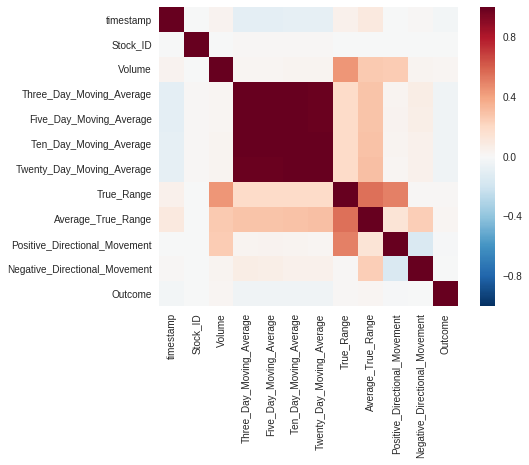

In [14]:
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor,vmax=1,square=True)
plt.show()
# highly correlation btwn features

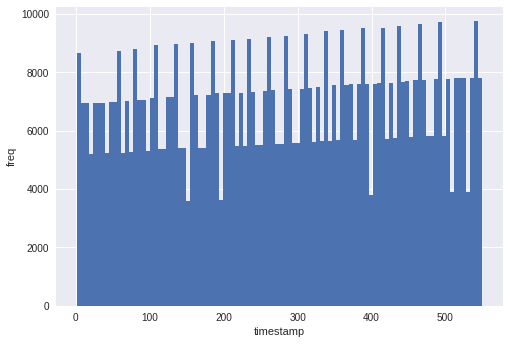

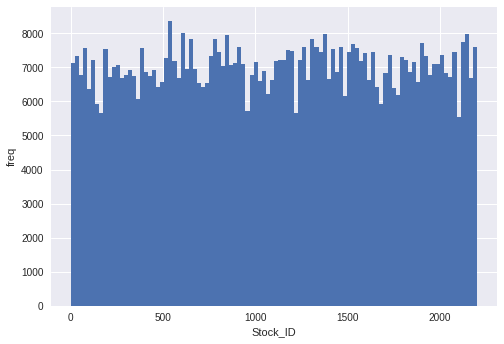

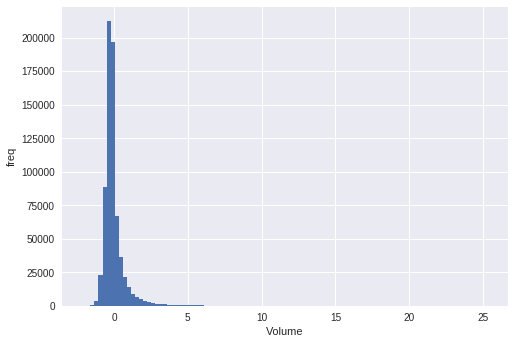

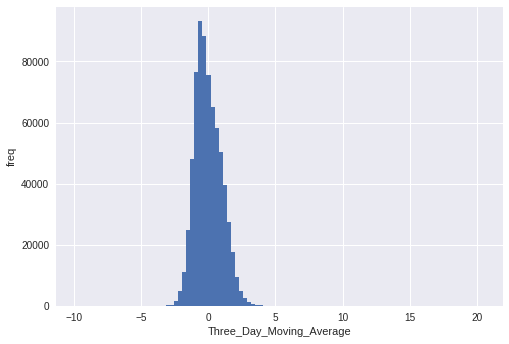

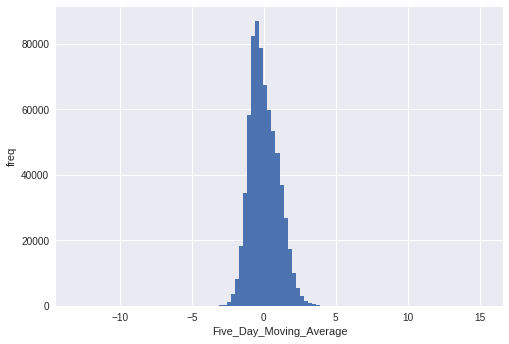

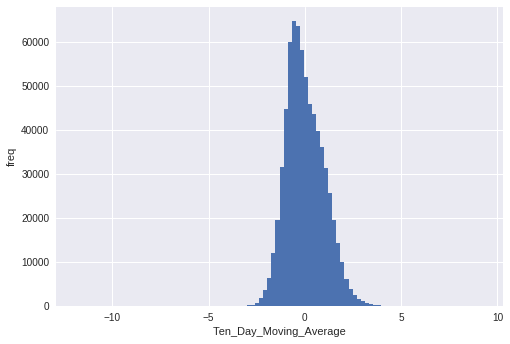

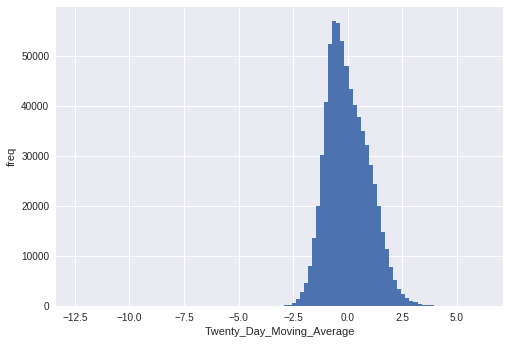

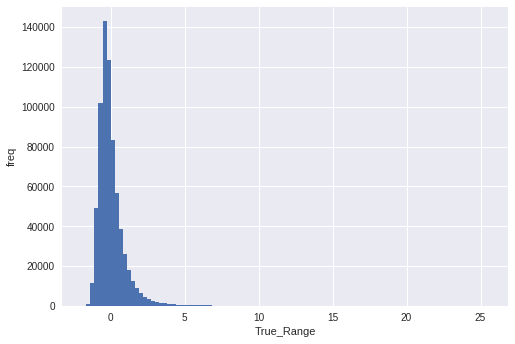

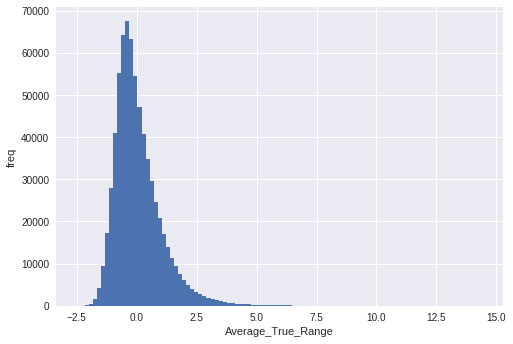

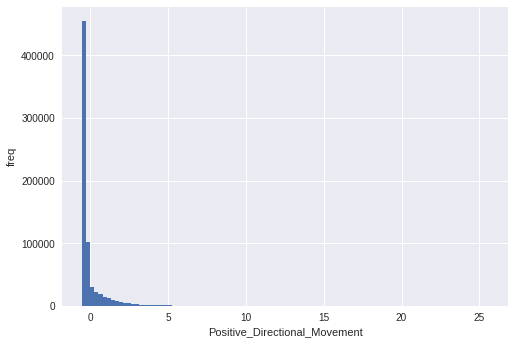

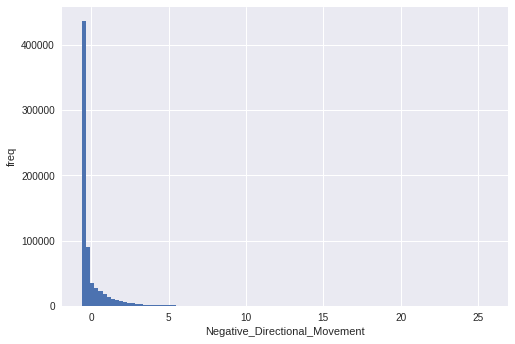

In [15]:
col_name = train.columns[1:-1]
for i in col_name:
    plt.clf()
    plt.hist(train[i].dropna(),bins=100)
    plt.ylabel('freq')
    plt.xlabel(i)
    fig1=plt.gcf()
    plt.show()

In [16]:
col_name = train.columns[1:-1]

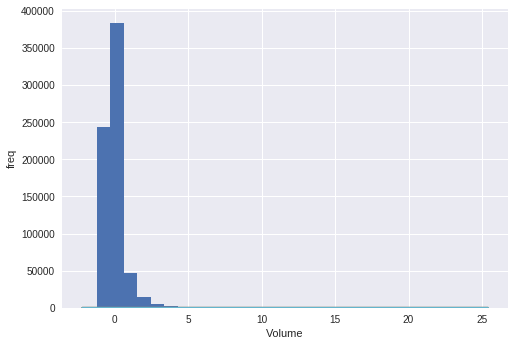

In [37]:
sns.distplot(train['Volume'].dropna(),bins=30)


In [60]:
dataset = train +test
dataset.head()

,Average_True_Range,Five_Day_Moving_Average,ID,Negative_Directional_Movement,Outcome,Positive_Directional_Movement,Stock_ID,Ten_Day_Moving_Average,Three_Day_Moving_Average,True_Range,Twenty_Day_Moving_Average,Volume,timestamp
0,-0.21720,-2.06882,1_11_554,-0.47686,NaN,-0.79806,2.0,-1.97095,-2.09566,-0.09534,-1.87504,0.10651,555.0
1,0.48612,-2.72591,3_12_554,0.50120,NaN,-0.59623,5.0,-2.65660,-2.73026,-0.94292,-2.54841,-1.05590,555.0
2,0.34419,0.62882,4_13_554,-0.75680,NaN,-0.55218,7.0,0.96075,0.53883,-0.24100,-0.26382,1.16377,555.0
3,-0.65052,-2.20678,6_14_554,-0.77875,NaN,-0.64813,10.0,-2.14520,-2.19423,-1.12454,-2.01112,-0.45158,555.0
4,-1.06928,-1.27717,10_16_554,-0.16748,NaN,-0.74020,16.0,-1.21028,-1.26398,-0.22715,-1.17432,-0.06424,555.0


In [61]:
train = train.fillna(train.median())
traintest = train

In [62]:
test = test.fillna(train.median())

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101946 entries, 0 to 101945
Data columns (total 12 columns):
ID                               101946 non-null object
timestamp                        101946 non-null int64
Stock_ID                         101946 non-null int64
Volume                           101946 non-null float64
Three_Day_Moving_Average         101946 non-null float64
Five_Day_Moving_Average          101946 non-null float64
Ten_Day_Moving_Average           101946 non-null float64
Twenty_Day_Moving_Average        101946 non-null float64
True_Range                       101946 non-null float64
Average_True_Range               101946 non-null float64
Positive_Directional_Movement    101946 non-null float64
Negative_Directional_Movement    101946 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 9.3+ MB


In [64]:
train1 = train
test1 =test

In [72]:
train1 = train1[col_name]
test1 = test1[col_name]
train1_y = train['Outcome']

In [98]:
def runXGB(train_X, train_y, test_X):
        params = {}
        params["objective"] = "binary:logistic"
        params["eta"] = 0.03
        params["min_child_weight"] = 10
        params["subsample"] = 0.8
        params["colsample_bytree"] = 0.7
        params["silent"] = 1
        params["max_depth"] = 10
        #params["max_delta_step"]=2
        params["seed"] = 0
        #params['eval_metric'] = "auc"
        plst = list(params.items())
        num_rounds = 100

        xgtrain = xgb.DMatrix(train_X, label=train_y)
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)
        pred_test_y = model.predict(xgtest)
        return pred_test_y

In [127]:
xgb1 = xgb.XGBClassifier(
        learning_rate =0.1,
        n_estimators=50,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
 

In [118]:
               
xgb1.fit(train[col_name],train['Outcome'])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [126]:
temp = pd.DataFrame()
temp['ID'] = test['ID']
temp['Outcome'] = xgb1.predict(test[col_name])
temp.to_csv('xgb1.csv', header=True, index = False)

In [122]:
xgb1.predict(test[col_name])

array([0, 0, 0, ..., 0, 0, 0])

0.45291779736146703

In [99]:
runXGB(train[col_name],train['Outcome'],test[col_name])

array([ 0.26243827,  0.25381359,  0.2561484 , ...,  0.2401776 ,
        0.23879194,  0.35900259], dtype=float32)

In [17]:
import xgboost as xgb

In [79]:
train.Stock_ID.value_counts()

201     394
1535    380
159     380
1690    380
155     380
1179    380
668     380
1180    380
1692    380
669     380
1181    380
1693    380
158     380
1182    380
671     380
1689    380
672     380
1184    380
1696    380
673     380
1185    380
1697    380
162     380
674     380
163     380
1187    380
676     380
666     380
1177    380
1700    380
       ... 
1842     67
1950     67
1342     63
1910     63
154      63
1841     60
1833     59
46       59
1220     58
1770     58
834      57
2199     57
1436     52
112      52
1778     51
706      51
1446     41
589      40
807      39
2111     36
93       35
2169     32
593      32
202      27
1404     26
291      26
1753     16
1781     12
1442      1
1579      1
Name: Stock_ID, dtype: int64

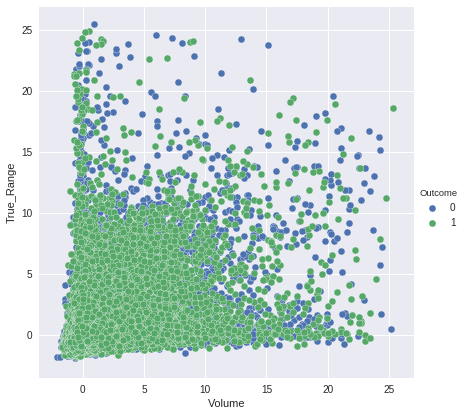

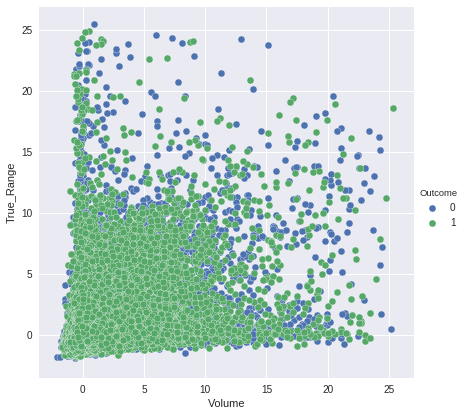

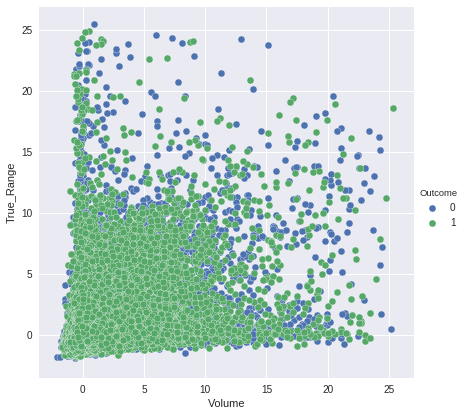

In [82]:
sns.pairplot(train, hue= 'Outcome', x_vars = 'Volume', y_vars = 'True_Range', size = 6)
plt.show()

In [ ]:
df.replace(np.nan, -1).groupby('b').sum()

In [84]:
z = train.groupby('Stock_ID').Twenty_Day_Moving_Average.median()

In [85]:
z[2]

0.11001

In [87]:

for i in range(4):
    if(train.Twenty_Day_Moving_Average[i].isnull()):
        x=train.Stock_ID[i]
        train.Twenty_Day_Moving_Average[i]=z[x]
        

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
for i in range(0,size):
    sns.boxplot(data= train, x='Volume',y='Outcome')  
    plt.show()

In [74]:
sns.boxplot(data= train, x='Volume',y='Outcome')  
plt.show()

KeyboardInterrupt: 

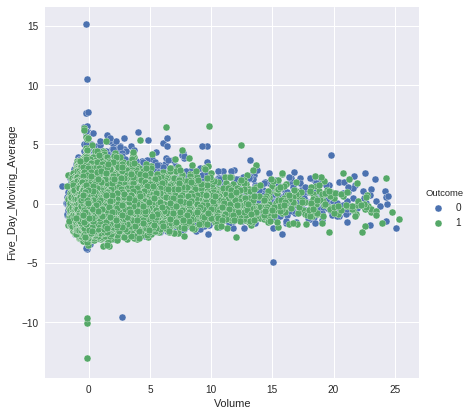

In [94]:
sns.pairplot(train, hue= 'Outcome', x_vars = 'Volume', y_vars = 'Five_Day_Moving_Average', size = 6)
plt.show()

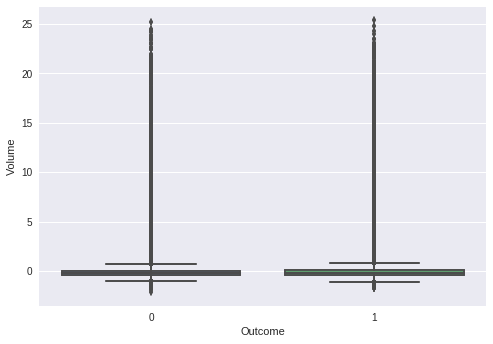

In [89]:
sns.boxplot(train['Outcome'], train['Volume'])
plt.show()

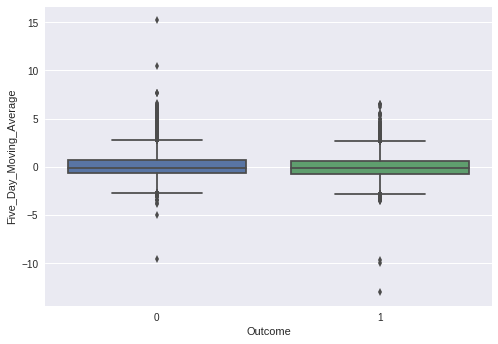

In [91]:
sns.boxplot(train['Outcome'], train['Five_Day_Moving_Average'])
plt.show()